### Environment set up

In [4]:
import numpy as np
import pandas as pd
import csv
import os
#import tabulate
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime
#from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
get_ipython().magic('matplotlib inline')
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8)

### Data Set Up

In [35]:
pd.set_option('display.max_columns', 500)

In [13]:
fdata = pd.read_csv(r'C:\Users\hp\Desktop\Flight_status_up1.csv')

In [27]:
#Handles class imbalance through sampling
classDistribution = fdata['ArrDel15'].value_counts()
print('Class imbalance:')
print(classDistribution)
zero = fdata[fdata['ArrDel15']==0].tail(classDistribution.min())
one = fdata[fdata['ArrDel15']==1]
data = zero.append(one)
del zero, one
data.sort_values(['Year','Month','DayofMonth','DayOfWeek'], ascending=[False,False,False,False])
#del fdata
print('Class imbalance evened out:')
print(data['ArrDel15'].value_counts())
len(data.columns)

Class imbalance:
0.0    852986
1.0    176028
Name: ArrDel15, dtype: int64
Class imbalance evened out:
0.0    176028
1.0    176028
Name: ArrDel15, dtype: int64


61

In [36]:
data.head(2)#Showing top 2 rows as sampled data is ordered by time with older data at the top

,FlightDate,Airline,Origin,Dest,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
836035,23-10-2018,Republic Airlines,BOS,BUF,False,1400,1411.0,11.0,11.0,1552.0,11.0,74.0,101,101.0,395,2018,4,10,23,2,DL,DL_CODESHARE,19790,DL,6080,YX,20452,YX,N875RW,6080,10721,1072102,30721,"Boston, MA",MA,25,Massachusetts,13,10792,1079206,30792,"Buffalo, NY",NY,36,New York,22,0.0,0.0,1400-1459,19.0,1430.0,1544.0,8.0,1541,11.0,0.0,0.0,1500-1559,2,0
836036,23-10-2018,Republic Airlines,BUF,BOS,False,1140,1159.0,19.0,19.0,1315.0,1.0,56.0,94,76.0,395,2018,4,10,23,2,DL,DL_CODESHARE,19790,DL,6081,YX,20452,YX,N867RW,6081,10792,1079206,30792,"Buffalo, NY",NY,36,New York,22,10721,1072102,30721,"Boston, MA",MA,25,Massachusetts,13,1.0,1.0,1100-1159,14.0,1213.0,1309.0,6.0,1314,1.0,0.0,0.0,1300-1359,2,0


In [29]:
data.tail(2)#Showing bottom 2 rows as sampled data is ordered by time with latest data at the bottom

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
1048073,06-10-2018,United Air Lines Inc.,BTV,ORD,False,False,1320,1613.0,173.0,173.0,...,1623.0,1727.0,10.0,1437,180.0,1.0,12.0,1400-1459,4,0
1048081,06-10-2018,United Air Lines Inc.,HNL,LAX,False,False,2057,2212.0,75.0,75.0,...,2232.0,627.0,10.0,516,81.0,1.0,5.0,0001-0559,11,0


In [30]:
data = data[data.Cancelled != True]
data.drop('Cancelled', axis = 1, inplace = True)

In [31]:
data.shape

(352056, 60)

In [32]:
print('Dimension reduced to:')
print(len(data.columns))
print('Sparsity per variable:')
((len(data.index) - data.count())/len(data.index))#Sparsity per variable retained

Dimension reduced to:
60
Sparsity per variable:


FlightDate                                 0.000000
Airline                                    0.000000
Origin                                     0.000000
Dest                                       0.000000
Diverted                                   0.000000
CRSDepTime                                 0.000000
DepTime                                    0.000000
DepDelayMinutes                            0.000000
DepDelay                                   0.000000
ArrTime                                    0.000000
ArrDelayMinutes                            0.000000
AirTime                                    0.000247
CRSElapsedTime                             0.000000
ActualElapsedTime                          0.000000
Distance                                   0.000000
Year                                       0.000000
Quarter                                    0.000000
Month                                      0.000000
DayofMonth                                 0.000000
DayOfWeek   

In [23]:
data.drop(['DepDelay','DepDel15','ArrDelay','DepDelayMinutes','ArrDelayMinutes'],
          axis=1, inplace=True)#To be excluded as per the task
data.drop(['CancellationCode'], axis=1, inplace=True)#Removed due to 100% sparsity as seen in above cell


KeyError: "[('DepDelay', 'DepDel15', 'ArrDelay', 'DepDelayMinutes', 'ArrDelayMinutes')] not found in axis"

In [33]:
print('Datatype of variables:')
data.dtypes#Checking variable data type as numeric type is most easy to deal with

Datatype of variables:


FlightDate                                  object
Airline                                     object
Origin                                      object
Dest                                        object
Diverted                                      bool
CRSDepTime                                   int64
DepTime                                    float64
DepDelayMinutes                            float64
DepDelay                                   float64
ArrTime                                    float64
ArrDelayMinutes                            float64
AirTime                                    float64
CRSElapsedTime                               int64
ActualElapsedTime                          float64
Distance                                     int64
Year                                         int64
Quarter                                      int64
Month                                        int64
DayofMonth                                   int64
DayOfWeek                      

### Exploratory Analysis

<Figure size 1080x360 with 0 Axes>

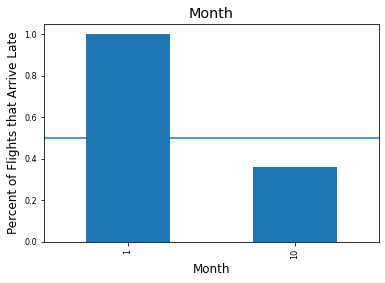

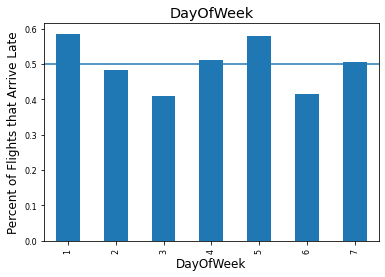

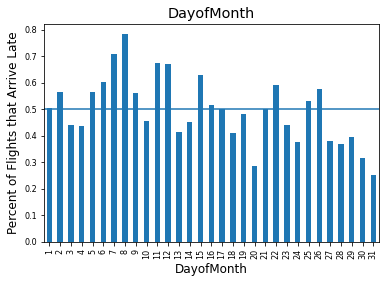

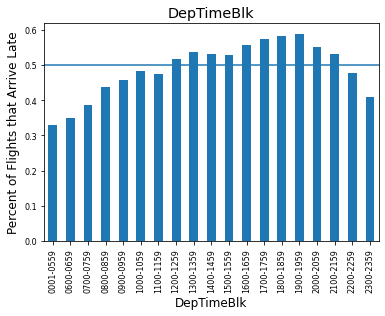

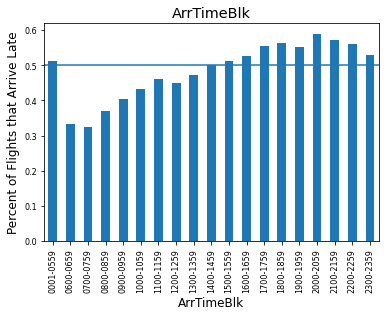

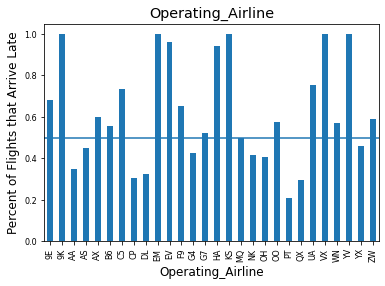

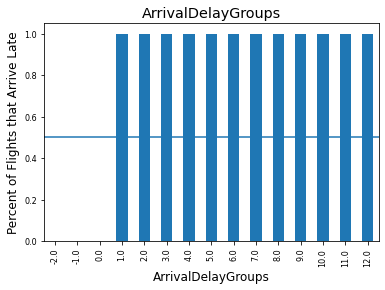

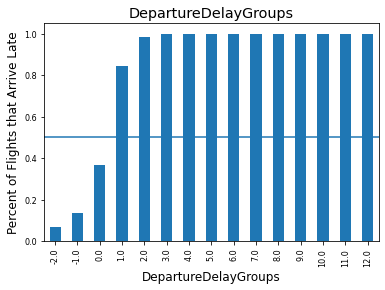

In [39]:
# Proportion of late flights per category based on all other flights

avgLate = np.sum(data['ArrDel15'])/len(data['ArrDel15'])
attributes = ['Month','DayOfWeek', 'DayofMonth', 'DepTimeBlk','ArrTimeBlk','Operating_Airline',
             'ArrivalDelayGroups','DepartureDelayGroups']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = data.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'ArrDel15']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='ArrDel15')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Percent of Flights that Arrive Late')
    plt.title(pred)
    plt.legend().remove()

In [40]:
data.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Diverted', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes',
       'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year',
       'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOf

In [41]:
le = LabelEncoder()

data["Operating Airline"] = le.fit_transform(data["Operating_Airline"])
UniqueCarrier = list(le.classes_)
#data["Carrier_Name"] = le.fit_transform(data["Carrier"])
Carrier = list(le.classes_)
data["Tail_Number"] = le.fit_transform(data["Tail_Number"])
TailNum = list(le.classes_)

data["Origin_Point"] = le.fit_transform(data["Origin"])
Origin = list(le.classes_)
data["Origin_CityName"] = le.fit_transform(data["OriginCityName"])
OriginCityName = list(le.classes_)
data["Origin_State"] = le.fit_transform(data["OriginState"])
OriginState = list(le.classes_)
data["OriginState_Name"] = le.fit_transform(data["OriginStateName"])
OriginStateName = list(le.classes_)

data["Destination"] = le.fit_transform(data["Dest"])
Dest = list(le.classes_)
data["Dest_CityName"] = le.fit_transform(data["DestCityName"])
DestCityName = list(le.classes_)
data["Dest_State"] = le.fit_transform(data["DestState"])
DestState = list(le.classes_)
data["Dest_StateName"] = le.fit_transform(data["DestStateName"])
DestStateName = list(le.classes_)

data["DepTime_Blk"] = le.fit_transform(data["DepTimeBlk"])
DepTimeBlk = list(le.classes_)
data["ArrTime_Blk"] = le.fit_transform(data["ArrTimeBlk"])
ArrTimeBlk = list(le.classes_)

In [43]:
data.drop(['Operating_Airline',
           'Origin','OriginCityName','OriginState','OriginStateName',
          'Dest','DestCityName','DestState','DestStateName',
          'DepTimeBlk','ArrTimeBlk'], axis=1, inplace=True)#Removing original encoded columns

In [44]:
data.drop(['DepartureDelayGroups','ArrivalDelayGroups'], axis=1, inplace=True)#Removing delay details as per the task

In [45]:
print('Dimension reduced to:')
print(len(data.columns))
data.describe()

Dimension reduced to:
57


,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,DepDel15,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,DistanceGroup,DivAirportLandings,Origin_Point,Origin_CityName,Origin_State,OriginState_Name,Destination,Dest_CityName,Dest_State,Dest_StateName,DepTime_Blk,ArrTime_Blk
count,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,351969.000000,352056.000000,352056.000000,352056.000000,352056.0,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,3.520560e+05,352056.000000,352056.000000,352056.000000,352056.000000,3.520560e+05,352056.000000,352056.000000,352056.000000,352021.000000,351969.000000,351969.000000,351969.000000,351969.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.0,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000
mean,1361.420183,1389.092678,30.820784,28.426069,1507.700497,32.664525,109.089894,137.512169,136.642736,771.507073,2018.0,3.337736,8.013208,15.529643,3.720255,19852.095209,2645.833998,20020.127889,2972.882192,2645.970471,12650.558735,1.265060e+06,31755.923612,27.326863,53.901621,12686.883121,1.268692e+06,31773.975734,27.230426,53.966434,0.398880,19.600843,1415.719740,1505.529808,7.976586,1524.820494,27.576102,0.500000,3.560581,0.0,173.365144,166.487215,22.241587,22.224601,174.685968,169.569486,22.158958,22.129661,8.356546,10.029924
std,479.024988,499.094763,68.704098,69.859173,550.209735,67.954517,70.155212,71.587013,72.538455,586.787057,0.0,1.244268,3.732804,8.776937,1.980098,289.484311,1845.654782,411.945773,1671.856332,1846.351977,1534.937586,1.534936e+05,1305.247462,16.206969,26.564077,1540.992733,1.540991e+05,1311.782004,16.325393,26.720910,0.489669,12.879188,500.764859,543.591415,6.902930,507.784389,70.832464,0.500001,2.321965,0.0,98.431208,101.740660,15.142604,15.204973,98.815949,101.830650,15.200069,15.263110,4.746682,4.893963
min,4.000000,1.000000,0.000000,-39.000000,1.000000,0.000000,8.000000,-99.000000,17.000000,16.000000,2018.0,1.000000,1.000000,1.000000,1.000000,19393.000000,1.000000,19393.000000,0.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-80.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,945.000000,959.000000,0.000000,-4.000000,1124.000000,0.000000,58.000000,86.000000,84.000000,337.000000,2018.0,4.000000,10.000000,8.000000,2.000000,19790.000000,1112.000000,19790.000000,1533.000000,1112.000000,11278.000000,1.127805e+06,30721.000000,12.000000,34.000000,11292.000000,1.129202e+06,30721.000000,12.000000,34.000000,0.000000,12.000000,1018.000000,1122.000000,4.000000,1130.000000,-9.000000,0.000000,2.000000,0.0,89.000000,65.000000,7.000000,7.000000,89.000000,70.000000,7.000000,7.000000,4.000000,6.000000
50%,1355.000000,1417.000000,2.000000,2.000000,1550.000000,14.500000,90.000000,118.000000,118.000000,606.000000,2018.0,4.000000,10.000000,15.000000,4.000000,19805.000000,2199.000000,19977.000000,2948.000000,2199.000000,12889.000000,1.288903e+06,31453.000000,26.000000,43.000000,12889.000000,1.288903e+06,31454.000000,26.000000,43.000000,0.000000,16.000000,1432.000000,1547.000000,6.000000,1550.000000,14.500000,0.500000,3.000000,0.0,184.000000,176.000000,20.000000,20.000000,183.000000,188.000000,20.000000,20.000000,8.000000,10.000000
75%,1745.000000,1811.000000,37.000000

###### Creation of data subset:
Predictor and target variable columns along with some basic statistics

In [77]:
#Data set up as predictors and target
rfDataOriginal = pd.DataFrame(data)
Delay_YesNo = rfDataOriginal['ArrDel15']
rfDataOriginal.drop(['ArrDel15'], axis=1, inplace=True)#Removing target variable
print('Dimension reduced to:')
print(len(rfDataOriginal.columns))
data.describe()

Dimension reduced to:
56


,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,DepDel15,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,DistanceGroup,DivAirportLandings,Origin_Point,Origin_CityName,Origin_State,OriginState_Name,Destination,Dest_CityName,Dest_State,Dest_StateName,DepTime_Blk,ArrTime_Blk
count,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,351969.000000,352056.000000,352056.000000,352056.000000,352056.0,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,3.520560e+05,352056.000000,352056.000000,352056.000000,352056.000000,3.520560e+05,352056.000000,352056.000000,352056.000000,352021.000000,351969.000000,351969.000000,351969.000000,351969.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.0,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000,352056.000000
mean,1361.420183,1389.092678,30.820784,28.426069,1507.700497,32.664525,109.089894,137.512169,136.642736,771.507073,2018.0,3.337736,8.013208,15.529643,3.720255,19852.095209,2645.833998,20020.127889,2972.882192,2645.970471,12650.558735,1.265060e+06,31755.923612,27.326863,53.901621,12686.883121,1.268692e+06,31773.975734,27.230426,53.966434,0.398880,19.600843,1415.719740,1505.529808,7.976586,1524.820494,27.576102,0.500000,3.560581,0.0,173.365144,166.487215,22.241587,22.224601,174.685968,169.569486,22.158958,22.129661,8.356546,10.029924
std,479.024988,499.094763,68.704098,69.859173,550.209735,67.954517,70.155212,71.587013,72.538455,586.787057,0.0,1.244268,3.732804,8.776937,1.980098,289.484311,1845.654782,411.945773,1671.856332,1846.351977,1534.937586,1.534936e+05,1305.247462,16.206969,26.564077,1540.992733,1.540991e+05,1311.782004,16.325393,26.720910,0.489669,12.879188,500.764859,543.591415,6.902930,507.784389,70.832464,0.500001,2.321965,0.0,98.431208,101.740660,15.142604,15.204973,98.815949,101.830650,15.200069,15.263110,4.746682,4.893963
min,4.000000,1.000000,0.000000,-39.000000,1.000000,0.000000,8.000000,-99.000000,17.000000,16.000000,2018.0,1.000000,1.000000,1.000000,1.000000,19393.000000,1.000000,19393.000000,0.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-80.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,945.000000,959.000000,0.000000,-4.000000,1124.000000,0.000000,58.000000,86.000000,84.000000,337.000000,2018.0,4.000000,10.000000,8.000000,2.000000,19790.000000,1112.000000,19790.000000,1533.000000,1112.000000,11278.000000,1.127805e+06,30721.000000,12.000000,34.000000,11292.000000,1.129202e+06,30721.000000,12.000000,34.000000,0.000000,12.000000,1018.000000,1122.000000,4.000000,1130.000000,-9.000000,0.000000,2.000000,0.0,89.000000,65.000000,7.000000,7.000000,89.000000,70.000000,7.000000,7.000000,4.000000,6.000000
50%,1355.000000,1417.000000,2.000000,2.000000,1550.000000,14.500000,90.000000,118.000000,118.000000,606.000000,2018.0,4.000000,10.000000,15.000000,4.000000,19805.000000,2199.000000,19977.000000,2948.000000,2199.000000,12889.000000,1.288903e+06,31453.000000,26.000000,43.000000,12889.000000,1.288903e+06,31454.000000,26.000000,43.000000,0.000000,16.000000,1432.000000,1547.000000,6.000000,1550.000000,14.500000,0.500000,3.000000,0.0,184.000000,176.000000,20.000000,20.000000,183.000000,188.000000,20.000000,20.000000,8.000000,10.000000
75%,1745.000000,1811.000000,37.000000

###### Check for multi-collinearity of variables

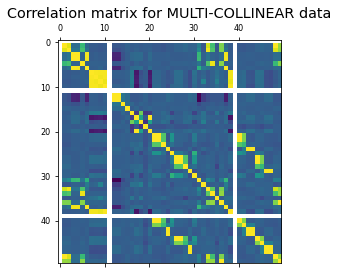

In [78]:
plt.matshow(rfDataOriginal.corr())
plt.title('Correlation matrix for MULTI-COLLINEAR data')
corr = rfDataOriginal.corr()
#corr

Note: Darker cells indicate high collinearity

In [79]:
corr = rfDataOriginal.corr()#Lists all pairs of highly collinear variables
indices = np.where(corr > 0.8)
indices = [(corr.columns[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('CRSDepTime', 'DepTime'),
 ('CRSDepTime', 'WheelsOff'),
 ('CRSDepTime', 'DepTime_Blk'),
 ('DepTime', 'WheelsOff'),
 ('DepTime', 'DepTime_Blk'),
 ('DepDelayMinutes', 'DepDelay'),
 ('DepDelayMinutes', 'ArrDelayMinutes'),
 ('DepDelayMinutes', 'ArrDelay'),
 ('DepDelay', 'ArrDelayMinutes'),
 ('DepDelay', 'ArrDelay'),
 ('ArrTime', 'WheelsOn'),
 ('ArrDelayMinutes', 'ArrDelay'),
 ('AirTime', 'CRSElapsedTime'),
 ('AirTime', 'ActualElapsedTime'),
 ('AirTime', 'Distance'),
 ('AirTime', 'DistanceGroup'),
 ('CRSElapsedTime', 'ActualElapsedTime'),
 ('CRSElapsedTime', 'Distance'),
 ('CRSElapsedTime', 'DistanceGroup'),
 ('ActualElapsedTime', 'Distance'),
 ('ActualElapsedTime', 'DistanceGroup'),
 ('Distance', 'DistanceGroup'),
 ('Quarter', 'Month'),
 ('Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline'),
 ('OriginAirportID', 'OriginAirportSeqID'),
 ('OriginAirportID', 'Origin_Point'),
 ('OriginAirportSeqID', 'Origin_Point'),
 ('OriginStateFips', 'Origin_State'),
 ('OriginStateFips', 

###### Removal of only redundant columns
Note: Collinearity is not the main consideration here(Part 3 deals with it)

In [80]:
rfDataOriginal.columns

Index(['FlightDate', 'Airline', 'Diverted', 'CRSDepTime', 'DepTime',
       'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter',
       'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'DestStateFips', 'DestWac', 'DepDel15', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'DistanceGroup',
       'DivAirportLandings', 'Origin_Point', 'Origin_CityName', 'Origin_State',
       'OriginState_Name', 'Destination'

In [81]:
#Subsetting to remove redundant variables using results from above cell for quick filtering
rfDataOriginal.drop(['OriginAirportSeqID','OriginCityMarketID', 'OriginStateFips', 'OriginWac', 
                     'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 'DestWac',
                     'CRSDepTime', 'CRSElapsedTime', 'CRSArrTime', 
                     'Origin_Point', 'Origin_CityName', 'Origin_State', 'OriginState_Name', 
                     'Destination', 'Dest_CityName', 'Dest_State', 'Dest_StateName'], axis=1, inplace=True)

In [82]:
rfDataOriginal.drop(['DepDelayMinutes',
 'DepDelay',
'ArrDelayMinutes',
'ActualElapsedTime',
'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
'DepDel15',
'ArrDelay',
'DivAirportLandings'], axis=1, inplace=True)

In [83]:
print('Dimension finally reduced to:')
print(len(rfDataOriginal.columns))
list(rfDataOriginal.columns)

Dimension finally reduced to:
21


['FlightDate',
 'Airline',
 'Diverted',
 'DepTime',
 'ArrTime',
 'AirTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'OriginAirportID',
 'DestAirportID',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'DistanceGroup',
 'DepTime_Blk',
 'ArrTime_Blk']

### Model building with non-redundant variables

###### Train/test split
- Train:Test split = 80:20

In [84]:
data.columns

Index(['FlightDate', 'Airline', 'Diverted', 'CRSDepTime', 'DepTime',
       'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter',
       'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'DestStateFips', 'DestWac', 'DepDel15', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15',
       'DistanceGroup', 'DivAirportLandings', 'Origin_Point',
       'Origin_CityName', 'Origin_State', 'OriginState_Name', '

In [85]:
bigX = pd.concat([rfDataOriginal, Delay_YesNo], axis = 1)

In [87]:
bigX.drop(['FlightDate'], axis=1, inplace=True)

In [100]:
bigX.drop(['Airline'], axis=1, inplace=True)

In [88]:
bigX.dropna(axis = 0,inplace = True)

In [93]:
rfDataOriginal = bigX.iloc[:,0:-1]
Delay_YesNo = bigX[['ArrDel15']]

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(rfDataOriginal, Delay_YesNo, test_size=0.2, random_state=42)

###### Grid search
Grid search is not performed for all the desired parameter combinations and values due to computational time

In [58]:
X_train["FlightDate"] = X_train["FlightDate"].apply(lambda x: int(''.join(x.split("-"))))#Formatting date for convinience


In [99]:
X_train.head(1)

,Airline,Diverted,DepTime,ArrTime,AirTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,TaxiOut,WheelsOff,WheelsOn,TaxiIn,DistanceGroup,DepTime_Blk,ArrTime_Blk
1012278,Frontier Airlines Inc.,False,1221.0,1351.0,65.0,414,2018,4,10,20,6,12889,14771,16.0,1237.0,1342.0,9.0,2,7,9


In [ ]:
startTimeGS = datetime.now()
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 25],
#                 'min_samples_split': [2, 4],
#                 'min_samples_leaf': [2, 4],
#                 'max_features': ['sqrt', 'log2'],
                 "criterion" : ["gini", "entropy"]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, Y_train)
bestModel = grid_rf.best_estimator_

In [103]:
bestParameters = grid_rf.best_params_
gridScores = grid_rf.cv_results_
print('Random forest Grid Search with non-redundant variables took [', datetime.now() - startTimeGS, '] seconds.')

Random forest Grid Search with non-redundant variables took [ 0:07:52.484627 ] seconds.


In [104]:
gridScores

{'mean_fit_time': array([ 4.47586038, 11.65959117,  5.08958805, 12.70911269]),
 'std_fit_time': array([0.31547041, 0.48332228, 0.07554048, 0.21250048]),
 'mean_score_time': array([0.07222102, 0.17134011, 0.07679327, 0.16425617]),
 'std_score_time': array([0.01189698, 0.02575772, 0.0145437 , 0.02064424]),
 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 25, 10, 25],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'n_estimators': 10},
  {'criterion': 'gini', 'n_estimators': 25},
  {'criterion': 'entropy', 'n_estimators': 10},
  {'criterion': 'entropy', 'n_estimators': 25}],
 'split0_test_score': array([0.93060587, 0.93873855, 0.93128063, 0.94062078]),
 'split1_test_score': array([0.92602458, 0.93824135, 0.92772924, 0.93703388]),


###### Best model, corresponding parameters and CV results
Used for model selection in next step

In [105]:
print(bestModel)
print(bestParameters)
gridScores

RandomForestClassifier(criterion='entropy', n_estimators=25)
{'criterion': 'entropy', 'n_estimators': 25}


{'mean_fit_time': array([ 4.47586038, 11.65959117,  5.08958805, 12.70911269]),
 'std_fit_time': array([0.31547041, 0.48332228, 0.07554048, 0.21250048]),
 'mean_score_time': array([0.07222102, 0.17134011, 0.07679327, 0.16425617]),
 'std_score_time': array([0.01189698, 0.02575772, 0.0145437 , 0.02064424]),
 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 25, 10, 25],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini', 'n_estimators': 10},
  {'criterion': 'gini', 'n_estimators': 25},
  {'criterion': 'entropy', 'n_estimators': 10},
  {'criterion': 'entropy', 'n_estimators': 25}],
 'split0_test_score': array([0.93060587, 0.93873855, 0.93128063, 0.94062078]),
 'split1_test_score': array([0.92602458, 0.93824135, 0.92772924, 0.93703388]),


###### Model selection
- Best model and parameters from above are used to train the final model on entire training set
- 10-fold Cross validation is performed to find the overall error

In [108]:
from sklearn.model_selection import KFold

In [112]:
startTimeRF = datetime.now()
rf = RandomForestClassifier(n_estimators = bestParameters.get('n_estimators'), 
#                            min_samples_split=bestParameters.get('min_samples_split'),
#                           min_samples_leaf = bestParameters.get('min_samples_leaf'),
#                           max_features = bestParameters.get('max_features'),
                           criterion = bestParameters.get('criterion'))
cv = KFold(n_splits=10, shuffle=True, random_state=2)
cvScores = cross_val_score(rf, X_train, Y_train, cv=cv)
print ('Mean cross validation score is: ' + str(np.mean(cvScores)))
rf.fit(X_train, Y_train)
print('Random forest training and testing with with non-redundant variables took [', 
      datetime.now() - startTimeRF, '] seconds.')

Mean cross validation score is: 0.9387871735644566
Random forest training and testing with with non-redundant variables took [ 0:02:24.545397 ] seconds.


###### Performance evaluation
- Prediction is done on the hold out test set to evaluate performance
- Confusion matrix, Accuracy and Recall are computed
- ROC curve is also plotted to pictorically depict 'Area under curve (AUC)' as 'Accuracy' 

Accuracy: 94.04%
Recall: 91.76%
Confusion matrix:
[[34011  1303]
 [ 2892 32188]]
Area under the ROC curve: 0.05966884227244499


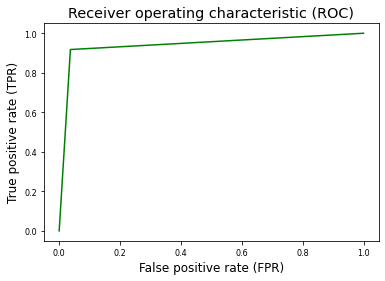

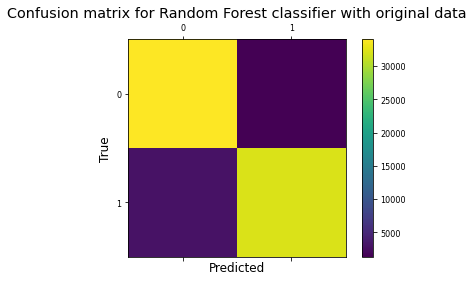

In [114]:
Y_rf_pred = rf.predict(X_test)

labels = [0, 1]
cm = confusion_matrix(Y_test, Y_rf_pred)

print('Accuracy: ' + str(np.round(100*float(cm[0][0]+cm[1][1])/float((cm[0][0]+cm[1][1] + cm[1][0] + cm[0][1])),2))+'%')
print('Recall: ' + str(np.round(100*float((cm[1][1]))/float((cm[1][0]+cm[1][1])),2))+'%')
print('Confusion matrix:')
print(cm)

fpr, tpr, _ = roc_curve(Y_test, Y_rf_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))

fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

fig = plt.figure(2)
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for Random Forest classifier with original data')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [115]:
X_train.head()

,Airline,Diverted,DepTime,ArrTime,AirTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,TaxiOut,WheelsOff,WheelsOn,TaxiIn,DistanceGroup,DepTime_Blk,ArrTime_Blk
1012278,13,False,1221.0,1351.0,65.0,414,2018,4,10,20,6,12889,14771,16.0,1237.0,1342.0,9.0,2,7,9
945046,16,False,1916.0,2019.0,49.0,228,2018,4,10,16,2,14489,14747,8.0,1924.0,2013.0,6.0,1,14,15
921575,9,False,2241.0,2227.0,29.0,151,2018,4,10,24,3,10397,12217,14.0,2255.0,2224.0,3.0,1,17,17
879019,22,False,1143.0,1435.0,94.0,651,2018,4,10,16,2,11292,11259,15.0,1158.0,1432.0,3.0,3,6,9
967061,3,False,1614.0,1826.0,48.0,328,2018,4,10,12,5,10693,11057,14.0,1628.0,1816.0,10.0,2,11,13
